In [1]:
from matplotlib.colors import ListedColormap
from sklearn import datasets, metrics, neighbors 
import sklearn.model_selection as ms

import numpy as np



In [3]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [22]:
digits = datasets.load_digits()

In [23]:
breast_cancer = datasets.load_breast_cancer()

## Digits

In [45]:
digits

{'DESCR': "Optical Recognition of Handwritten Digits Data Set\n===================================================\n\nNotes\n-----\nData Set Characteristics:\n    :Number of Instances: 5620\n    :Number of Attributes: 64\n    :Attribute Information: 8x8 image of integer pixels in the range 0..16.\n    :Missing Attribute Values: None\n    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)\n    :Date: July; 1998\n\nThis is a copy of the test set of the UCI ML hand-written digits datasets\nhttp://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits\n\nThe data set contains images of hand-written digits: 10 classes where\neach class refers to a digit.\n\nPreprocessing programs made available by NIST were used to extract\nnormalized bitmaps of handwritten digits from a preprinted form. From a\ntotal of 43 people, 30 contributed to the training set and different 13\nto the test set. 32x32 bitmaps are divided into nonoverlapping blocks of\n4x4 and the number of on pixels ar

В датасете цифры:

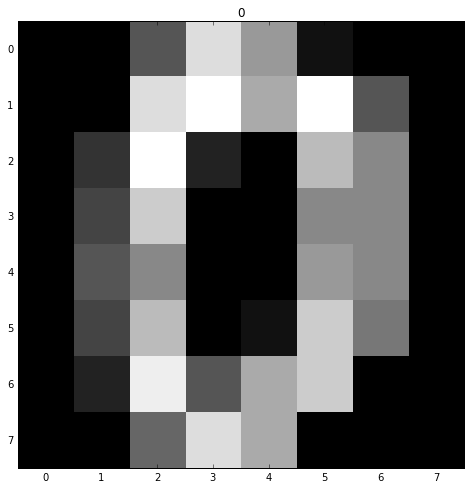

In [46]:
plt.figure(figsize = (8, 8))

plt.imshow(digits.images[0], cmap = 'gray', interpolation = 'nearest')

plt.title(str(digits.target[0]))

In [47]:
digits.data[:50]

array([[  0.,   0.,   5., ...,   0.,   0.,   0.],
       [  0.,   0.,   0., ...,  10.,   0.,   0.],
       [  0.,   0.,   0., ...,  16.,   9.,   0.],
       ..., 
       [  0.,   0.,   0., ...,   6.,   0.,   0.],
       [  0.,   0.,   2., ...,   6.,   0.,   0.],
       [  0.,   0.,   1., ...,   8.,   0.,   0.]])

In [48]:
digits.target[:50]

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2,
       3, 4, 5, 6, 7, 8, 9, 0, 9, 5, 5, 6, 5, 0, 9, 8, 9, 8, 4, 1, 7, 7, 3,
       5, 1, 0, 0])

## Breast_cancer

In [44]:
breast_cancer

{'DESCR': 'Breast Cancer Wisconsin (Diagnostic) Database\n=============================================\n\nNotes\n-----\nData Set Characteristics:\n    :Number of Instances: 569\n\n    :Number of Attributes: 30 numeric, predictive attributes and the class\n\n    :Attribute Information:\n        - radius (mean of distances from center to points on the perimeter)\n        - texture (standard deviation of gray-scale values)\n        - perimeter\n        - area\n        - smoothness (local variation in radius lengths)\n        - compactness (perimeter^2 / area - 1.0)\n        - concavity (severity of concave portions of the contour)\n        - concave points (number of concave portions of the contour)\n        - symmetry \n        - fractal dimension ("coastline approximation" - 1)\n\n        The mean, standard error, and "worst" or largest (mean of the three\n        largest values) of these features were computed for each image,\n        resulting in 30 features.  For instance, field 3 i

In [49]:
breast_cancer.data[:50]

array([[  1.79900000e+01,   1.03800000e+01,   1.22800000e+02, ...,
          2.65400000e-01,   4.60100000e-01,   1.18900000e-01],
       [  2.05700000e+01,   1.77700000e+01,   1.32900000e+02, ...,
          1.86000000e-01,   2.75000000e-01,   8.90200000e-02],
       [  1.96900000e+01,   2.12500000e+01,   1.30000000e+02, ...,
          2.43000000e-01,   3.61300000e-01,   8.75800000e-02],
       ..., 
       [  1.31700000e+01,   1.86600000e+01,   8.59800000e+01, ...,
          2.08800000e-01,   3.90000000e-01,   1.17900000e-01],
       [  1.20500000e+01,   1.46300000e+01,   7.80400000e+01, ...,
          6.54800000e-02,   2.74700000e-01,   8.30100000e-02],
       [  1.34900000e+01,   2.23000000e+01,   8.69100000e+01, ...,
          1.28200000e-01,   2.87100000e-01,   6.91700000e-02]])

In [50]:
breast_cancer.target[:50]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 1])

## Детальный анализ данных

Посмотрим более детально на структуру данных

In [60]:
from collections import Counter

(array([ 0.11111111,  0.11111111,  0.11111111,  0.11111111,  0.11111111,
         0.11111111,  0.11111111,  0.11111111,  0.11111111,  0.11111111]),
 array([ 0. ,  0.9,  1.8,  2.7,  3.6,  4.5,  5.4,  6.3,  7.2,  8.1,  9. ]),
 <a list of 10 Patch objects>)

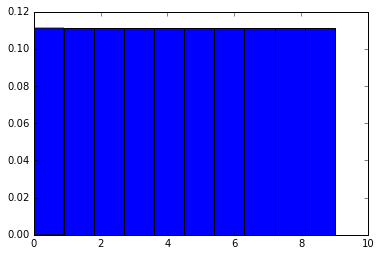

In [69]:
plt.hist(list(Counter(digits.target)), normed=True)

Классы полностью сбалансированы

Data представляет из себя вектор-строку записанных подряд битов изображения:

In [137]:
print digits.data[3]
print digits.images[3]

[  0.   0.   7.  15.  13.   1.   0.   0.   0.   8.  13.   6.  15.   4.   0.
   0.   0.   2.   1.  13.  13.   0.   0.   0.   0.   0.   2.  15.  11.   1.
   0.   0.   0.   0.   0.   1.  12.  12.   1.   0.   0.   0.   0.   0.   1.
  10.   8.   0.   0.   0.   8.   4.   5.  14.   9.   0.   0.   0.   7.  13.
  13.   9.   0.   0.]
[[  0.   0.   7.  15.  13.   1.   0.   0.]
 [  0.   8.  13.   6.  15.   4.   0.   0.]
 [  0.   2.   1.  13.  13.   0.   0.   0.]
 [  0.   0.   2.  15.  11.   1.   0.   0.]
 [  0.   0.   0.   1.  12.  12.   1.   0.]
 [  0.   0.   0.   0.   1.  10.   8.   0.]
 [  0.   0.   8.   4.   5.  14.   9.   0.]
 [  0.   0.   7.  13.  13.   9.   0.   0.]]


Поскольку исходов у digits более двух, и все они дискретны, то среди BernoulliNB, MultinomialNB и GaussianNB лучшую оценку будет давать MultinomialNB 

In [138]:
Counter(breast_cancer.target)

Counter({0: 212, 1: 357})

Классы немного несбалансированы, более того 'самый плохой' estimator, который будет всегда говорить нет (0), будет иметь точность:

In [139]:
Counter(breast_cancer.target)[0] / float(Counter(breast_cancer.target)[1])

0.5938375350140056

Учитывая, что многие данные breast_cancer непрерывные, то среди BernoulliNB, MultinomialNB и GaussianNB лучшую оценку будет давать GaussianNB 

(array([ 0.01580383,  0.06571067,  0.15387941,  0.1072997 ,  0.04574793,
         0.04158903,  0.03160766,  0.00582246,  0.00332712,  0.00249534]),
 array([  6.981 ,   9.0939,  11.2068,  13.3197,  15.4326,  17.5455,
         19.6584,  21.7713,  23.8842,  25.9971,  28.11  ]),
 <a list of 10 Patch objects>)

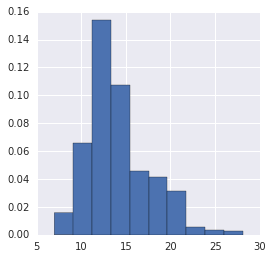

In [140]:
plt.figure(figsize=(4, 4))
hist(breast_cancer.data[:, 0], normed=True)

(array([ 0.01010381,  0.05705683,  0.09152867,  0.08617959,  0.05289644,
         0.02377368,  0.01248118,  0.00237737,  0.00118868,  0.00059434]),
 array([  9.71 ,  12.667,  15.624,  18.581,  21.538,  24.495,  27.452,
         30.409,  33.366,  36.323,  39.28 ]),
 <a list of 10 Patch objects>)

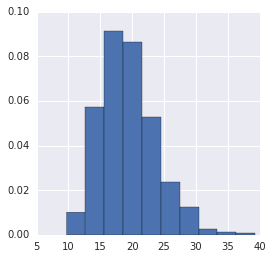

In [141]:
plt.figure(figsize=(4, 4))
hist(breast_cancer.data[:, 1], normed=True)

(array([ 0.00182172,  0.01129463,  0.02246782,  0.01408793,  0.00752976,
         0.00595094,  0.00412922,  0.00097158,  0.00036434,  0.00048579]),
 array([  43.79 ,   58.261,   72.732,   87.203,  101.674,  116.145,
         130.616,  145.087,  159.558,  174.029,  188.5  ]),
 <a list of 10 Patch objects>)

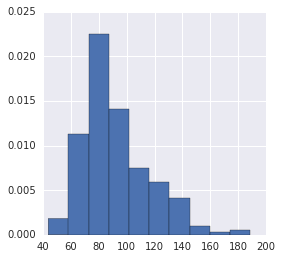

In [142]:
plt.figure(figsize=(4, 4))
hist(breast_cancer.data[:, 2], normed=True)

(array([  6.93296457e-04,   1.87115495e-03,   7.52934862e-04,
          3.50375629e-04,   3.80194831e-04,   1.04367209e-04,
          4.47288037e-05,   2.23644018e-05,   7.45480061e-06,
          1.49096012e-05]),
 array([  143.5 ,   379.25,   615.  ,   850.75,  1086.5 ,  1322.25,
         1558.  ,  1793.75,  2029.5 ,  2265.25,  2501.  ]),
 <a list of 10 Patch objects>)

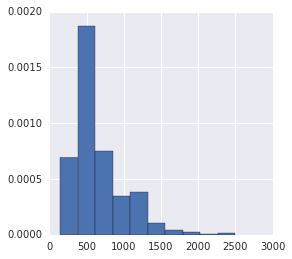

In [143]:
plt.figure(figsize=(4, 4))
hist(breast_cancer.data[:, 3], normed=True)

(array([  0.31731863,   4.12514222,  17.45252477,  25.38549057,
         26.02012784,  12.53408597,   3.17318632,   0.79329658,
          0.31731863,   0.15865932]),
 array([ 0.05263 ,  0.063707,  0.074784,  0.085861,  0.096938,  0.108015,
         0.119092,  0.130169,  0.141246,  0.152323,  0.1634  ]),
 <a list of 10 Patch objects>)

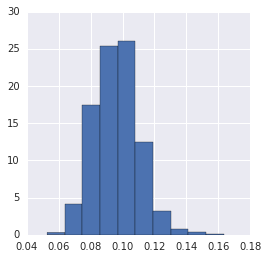

In [144]:
plt.figure(figsize=(4, 4))
hist(breast_cancer.data[:, 4], normed=True)

(array([ 3.66566188,  9.81103621,  7.16960338,  4.68989093,  2.58752603,
         1.4015766 ,  0.80860189,  0.26953396,  0.21562717,  0.05390679]),
 array([ 0.01938 ,  0.051982,  0.084584,  0.117186,  0.149788,  0.18239 ,
         0.214992,  0.247594,  0.280196,  0.312798,  0.3454  ]),
 <a list of 10 Patch objects>)

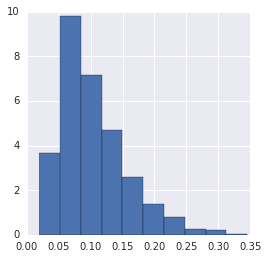

In [145]:
plt.figure(figsize=(4, 4))
hist(breast_cancer.data[:, 5], normed=True)

Как видим, многие данные имеют распределение, похожее на нормальное

## Сравнение оценок

In [146]:
from sklearn.naive_bayes import BernoulliNB, MultinomialNB, GaussianNB
estimators = [BernoulliNB(), MultinomialNB(), GaussianNB()]
for estimator in estimators:
    digits_result = ms.cross_val_score(estimator, digits.data, digits.target).mean()
    bc_result = ms.cross_val_score(estimator, breast_cancer.data, breast_cancer.target).mean()
    print(u'Оценка с помощью %s' % estimator)
    print(u'Для датасета цифр точность равна: %f, точность оценки рака груди: %f' % (digits_result, bc_result))
    print(u'---')

Оценка с помощью BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)
Для датасета цифр точность равна: 0.825824, точность оценки рака груди: 0.627420
---
Оценка с помощью MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)
Для датасета цифр точность равна: 0.870877, точность оценки рака груди: 0.894579
---
Оценка с помощью GaussianNB(priors=None)
Для датасета цифр точность равна: 0.818600, точность оценки рака груди: 0.936749
---


Как видно, оценка с помощью Бернулли очень плохо показала себя на тесте с недискретными данными, а теоретические догадки совпали на практике.

## Ответы на вопросы из задания

1) Каким получилось максимальное качество классификации на датасете breast_cancer?

In [147]:
0.936749

0.936749

2) Каким получилось максимальное качество классификации на датасете digits?

In [148]:
0.870877

0.870877

3) Какие утверждения из приведенных ниже верны?

(a) На вещественных признаках лучше всего сработал наивный байесовский классификатор с распределением Бернулли

(b) На вещественных признаках лучше всего сработал наивный байесовский классификатор с мультиномиальным распределением

(c) Мультиномиальное распределение лучше показало себя на выборке с целыми неотрицательными значениями признаков

(d) На вещественных признаках лучше всего сработало нормальное распределение

(с), (d)